In [73]:
from graphviz import Digraph

graph = Digraph(comment='The Farmer, Wolf, Cabbage, Cat, Mouse, Cheese Puzzle')

# The Farmer, Wolf, Sheep, Cat, Mouse, Cheese Puzzle

This is a well known variation on the popular farmer, wolf, sheep, cabbage puzzle. 

A farmer is on the side of the river with his wolf, cabbage, cat, mouse, and cheese. On the bank of the river is a small boat which can hold the farmer and only one more item (e.g., sheep, wolf, or cat). 

If the farmer leaves the cat and the mouse on one side of the river alone, then the cat will eat the mouse. Similarly, the mouse will eat the cheese or the cabbage if the farmer is not there to stop it. However, if the wolf is on the same side as the mouse, then the wolf will chase the mouse, so that it does not have time to eat either the cheese or the cabbage.

Help the farmer reach the other side of the river with all of his posessions intact.

## Representation

We use a variation of the first farmer program for our representation.

### State Space

The state space representation must encapsulate all important information about the domain. In this case, the only thing that matters what side of the river the various items are on.

So we may consider a simple dictionary with items and which side of the river they are on.

In [74]:
initial = { 'wolf': 'left', 'cabbage':'left', 'cat' : 'left', 'mouse' : 'left', 'cheese' : 'left', 'farmer':'left' }

### IsGoal Predicate

We need to write a function that checks if we have found a solution. In this case, we need to check if the farmer and all of its posessions are on the right side of the river.

In [75]:
def isGoal( state ):
    goal = True
    for k in state:
        if ( state[k] != 'right'):
            goal = False
            break
    return goal

print('isGoal(', initial, ')=', isGoal(initial) )

s = { 'farmer': 'right', 'cat' : 'right', 'mouse': 'right', 'wolf' : 'right', 'cheese' : 'right', 'cabbage' : 'right' }
print('isGoal(', s, ')=', isGoal(s) )


isGoal( {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} )= False
isGoal( {'farmer': 'right', 'cat': 'right', 'mouse': 'right', 'wolf': 'right', 'cheese': 'right', 'cabbage': 'right'} )= True


### Sucessor Function

Now I define a function that generates all possible successors (children) for a given state. What I need to record is the children state, but also the action that I applied to reach this state.

So I define a successor function as well as a couple of utility functions.

### Checking for invalid States

In contrast to the previous Farmer puzzle, the `isValidState` function needs to be changed to maintain the constraints
on the world states.

In [76]:
def isValidState( state ):
    valid = True
    checkSide = otherSide( state['farmer'] )
    if ( state['cat'] == checkSide ) and ( state['mouse'] == checkSide ):
        valid = False
    elif ( state['wolf'] != checkSide ) and ( state['mouse'] == checkSide ) and ( state['cabbage'] == checkSide ):
        valid = False
    elif ( state['wolf'] != checkSide ) and ( state['mouse'] == checkSide ) and ( state['cheese'] == checkSide ):
        valid = False
    return valid

def otherSide( side ):
    other = '?'
    if ( side == 'left'):
        other = 'right'
    elif (side == 'right'):
        other = 'left'
    return other

def toString( state ):
    right=''
    left=''
    for k in state:
        if ( state[k] == 'right'):
            if right == '':
                sep = ''
            else:
                sep = ','
            right = right + sep + k[0:3]
        elif ( state[k] == 'left'):
            if left == '':
                sep = ''
            else:
                sep = ','
            left = left + sep + k[0:3]
    return left + '|----|' + right
            
def successors( state, isValid ):
    farmerSide=state['farmer']
    children = []
    for k in state:
        if ( state[k] == farmerSide ):
            newState = state.copy()
            newState[k] = otherSide( farmerSide )
            newState['farmer'] = otherSide( farmerSide )
            if ( isValid( newState ) ):
                children = children + [ (newState, "move " + k + " to " + otherSide( farmerSide ) ) ]
    return children

print( 'Successors of state', initial, 'are', successors( initial, isValidState ) )
print( 'toString', toString( initial ) )

Successors of state {'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'left', 'cheese': 'left', 'farmer': 'left'} are [({'wolf': 'left', 'cabbage': 'left', 'cat': 'right', 'mouse': 'left', 'cheese': 'left', 'farmer': 'right'}, 'move cat to right'), ({'wolf': 'left', 'cabbage': 'left', 'cat': 'left', 'mouse': 'right', 'cheese': 'left', 'farmer': 'right'}, 'move mouse to right')]
toString wol,cab,cat,mou,che,far|----|


## Search

After modifying the `isValidState` function, we can use the `search`, `DFsearch`, `IDDFsearch`, and `BFsearch` functions that we developed in the original farmer problem.

In [98]:
def search( initial, dfs, isGoal, isValid, successors, depthLimit = 0, log = False ):
    queue = [ ( initial, 'N1', 0, [initial], ['*** initial ***'] ) ]
    global graph
    graph = Digraph('Search Space')
    graph.node('N1', toString( initial ) )
    numNodes = 1
    result = None
    while( len(queue) > 0 ):
        state, label, level, history, actions = queue.pop()
        last = len(queue)
        if ( depthLimit <= 0 ) or ( level < depthLimit ):
            if ( isGoal( state ) ):
                result = ( state, history, actions + [ '*** goal ***' ], numNodes )
                break
            children = successors( state, isValid )
            for ns, na in children:
                if ( ns not in history ):
                    numNodes = numNodes + 1
                    nlabel = 'N' + str(numNodes)
                    if ( isGoal( ns ) ):
                        graph.node(nlabel, toString( ns ), shape='rectangle' ) 
                    else:
                        graph.node( nlabel, toString( ns ), shape='round' )
                    graph.edge(label, nlabel, label=na )
                        
                    node = ( ns, nlabel, level+1, history + [ ns], actions + [na] )
                    if ( dfs ):
                        queue.insert( last, node )
                    else:
                        queue.insert( 0, node )
                    
    if result is None:
        result = [ numNodes ]
    return result

def DFsearch( initial, isGoal, isValid, successors, depthLimit, log ):
    return search( initial, True, isGoal, isValid, successors, depthLimit, log )

def BFsearch( initial, isGoal, isValid, successors, depthLimit, log ):
    return search( initial, False, isGoal, isValid, successors, depthLimit, log )


In [99]:
DFsearch( initial, isGoal, isValidState, successors, 0, False )

({'cabbage': 'right',
  'cat': 'right',
  'cheese': 'right',
  'farmer': 'right',
  'mouse': 'right',
  'wolf': 'right'},
 [{'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'right',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'right',
   'wolf': 'left'},
  {'cabbage':

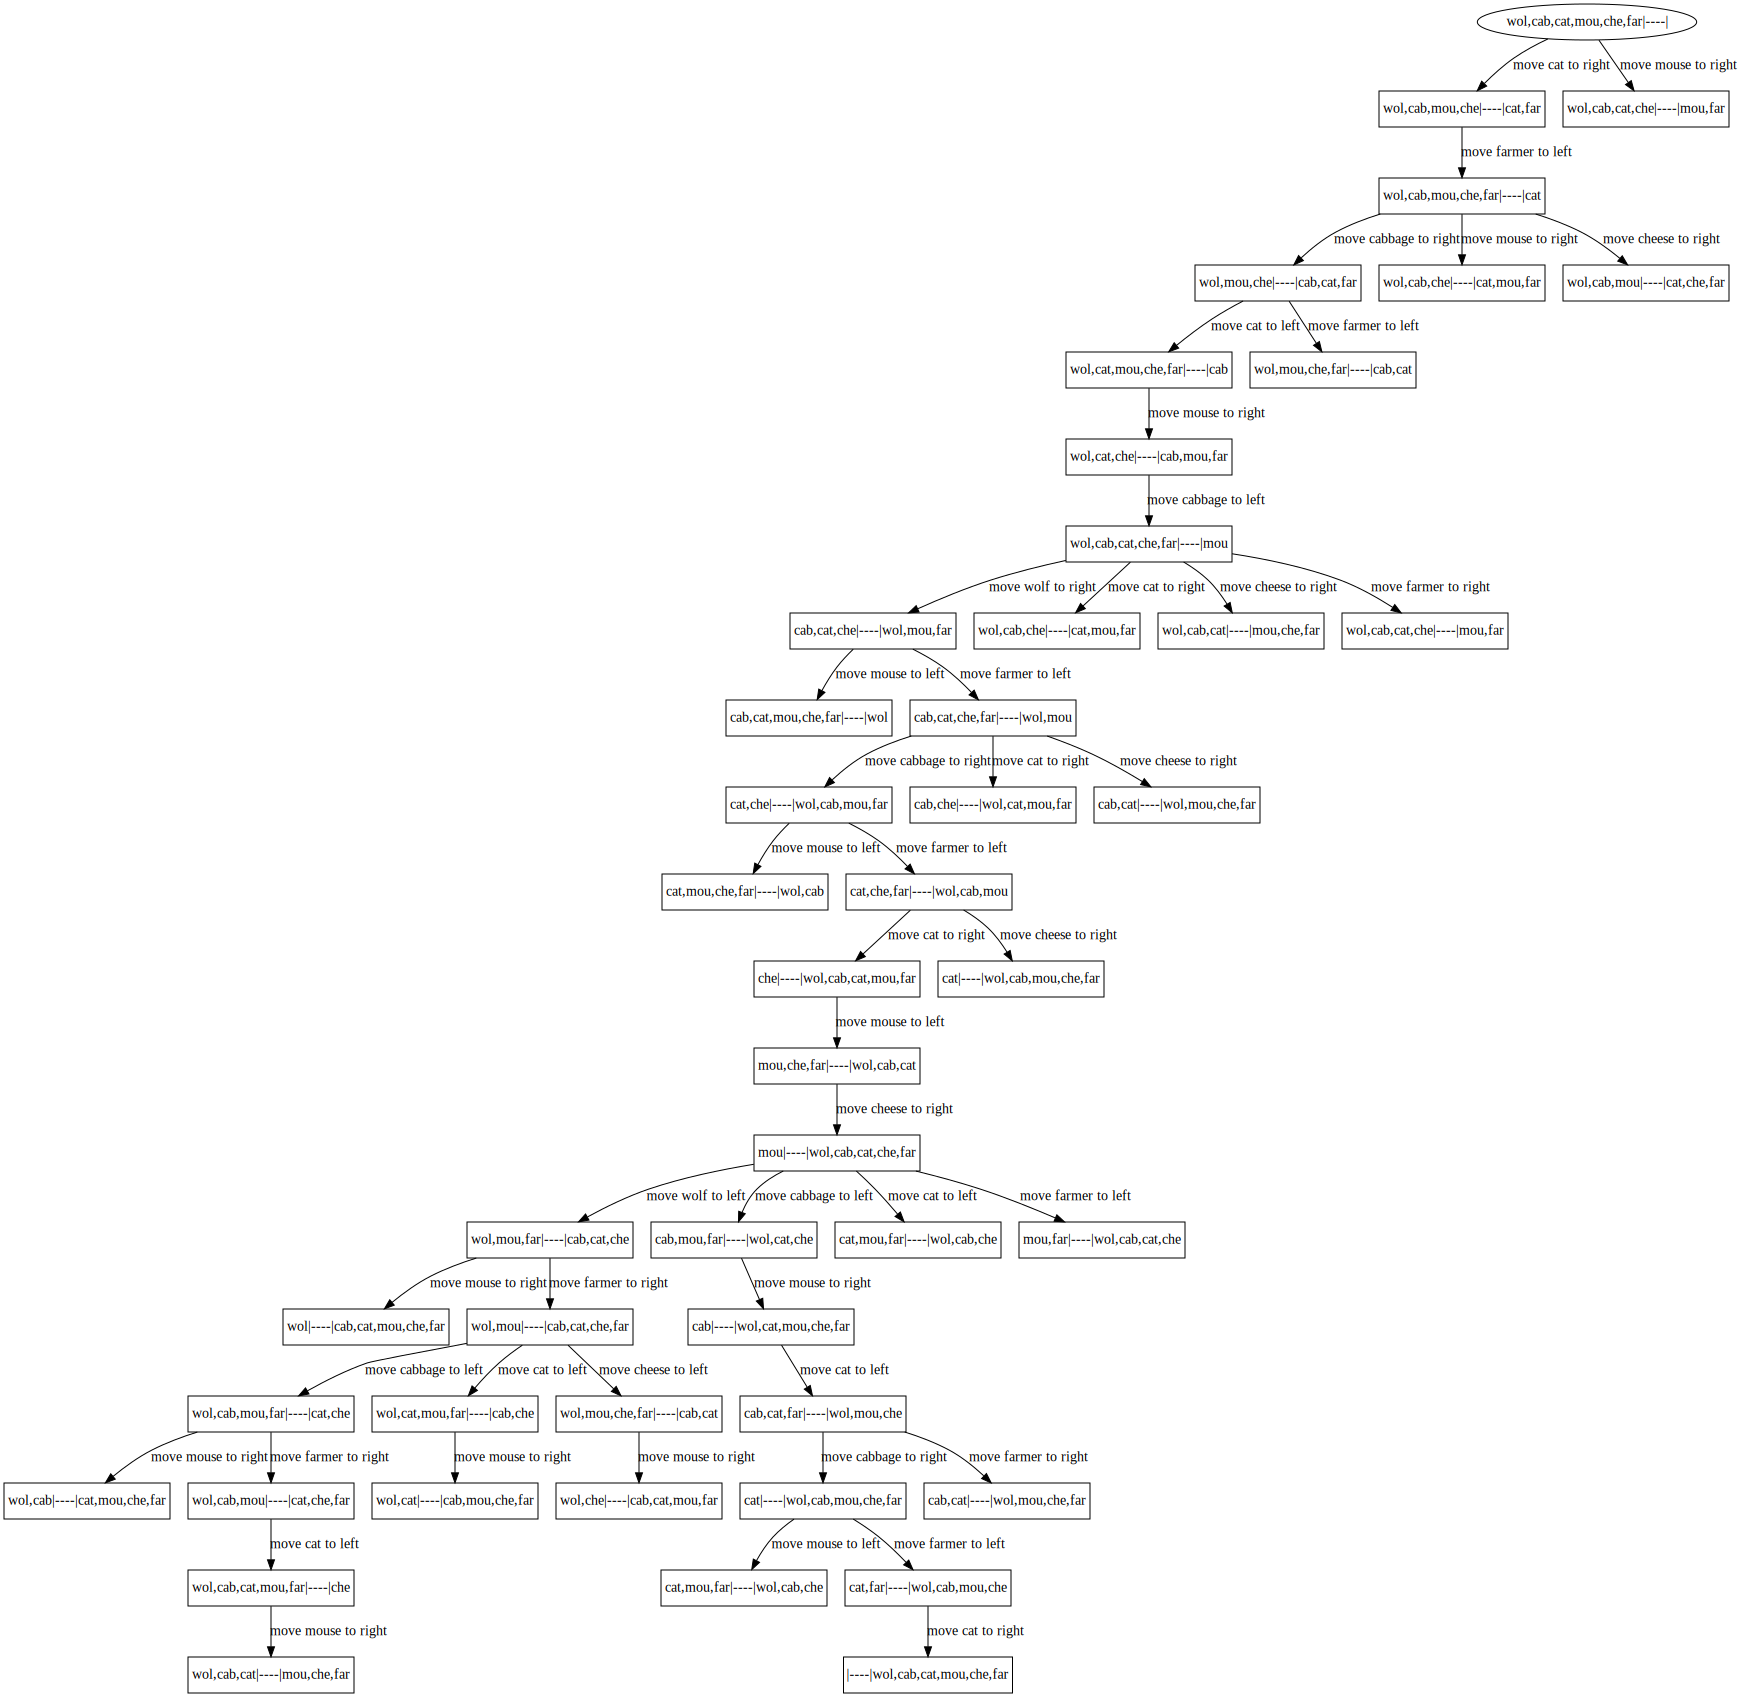

In [100]:
graph

In [97]:
DFsearch( initial, lambda state: False, isValidState, successors, 0, False )

[3605]

In [81]:
BFsearch( initial, isGoal, isValidState, successors, 0, False )

({'cabbage': 'right',
  'cat': 'right',
  'cheese': 'right',
  'farmer': 'right',
  'mouse': 'right',
  'wolf': 'right'},
 [{'cabbage': 'left',
   'cat': 'left',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'left',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'left',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'right',
   'farmer': 'right',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabbage': 'right',
   'cat': 'right',
   'cheese': 'right',
   'farmer': 'left',
   'mouse': 'left',
   'wolf': 'left'},
  {'cabba

In [83]:
graph